### Project Outile

**Problem Statement:**
1. High employee attrition rate  have significant implications for organizations, leading to escalated recruitment and training expenses, additional costs associated with productivity ramp-up, and a decline in overall employee morale.
2. It is crucial for companies to understand the underlying factors contributing to attrition and take proactive measures to address them.

**Data source:**

IBM HR Analytics Employee Attrition & Performance

**Objective:**
1. Understand each viarables relationship with each other, explore what correlate to performance and attrition
2. Explore gender equality in pay and management 
3. Build a predictive model for attrition

## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
sns.set_style('whitegrid') 
sns.set_palette('vlag')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.DataFrame(data)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Categorical Columns
cat = df.select_dtypes(['object'])
#Numerical Columns
num = df.select_dtypes(['number'])

In [5]:
#Print Unique values of categorical columns 
for i in cat:
    print("unique values of:",i,set(df[i]))

unique values of: Attrition {'Yes', 'No'}
unique values of: BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
unique values of: Department {'Human Resources', 'Research & Development', 'Sales'}
unique values of: EducationField {'Medical', 'Technical Degree', 'Life Sciences', 'Other', 'Marketing', 'Human Resources'}
unique values of: Gender {'Female', 'Male'}
unique values of: JobRole {'Sales Representative', 'Sales Executive', 'Manufacturing Director', 'Manager', 'Laboratory Technician', 'Research Scientist', 'Healthcare Representative', 'Research Director', 'Human Resources'}
unique values of: MaritalStatus {'Married', 'Divorced', 'Single'}
unique values of: Over18 {'Y'}
unique values of: OverTime {'Yes', 'No'}


In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df[['MonthlyIncome','MonthlyRate']]

,MonthlyIncome,MonthlyRate
0,5993,19479
1,5130,24907
2,2090,2396
3,2909,23159
4,3468,16632
...,...,...
1465,2571,12290
1466,9991,21457
1467,6142,5174
1468,5390,13243


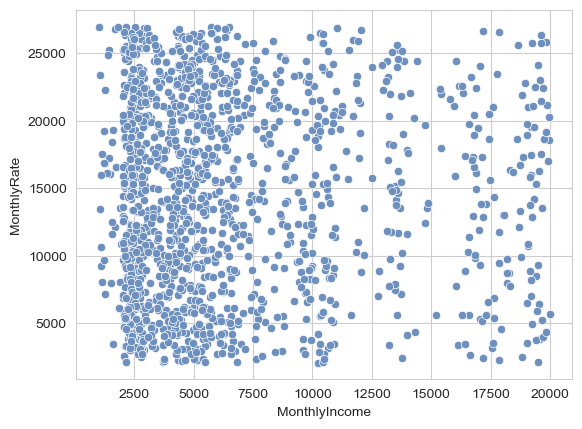

In [8]:
sns.scatterplot(data=df, x="MonthlyIncome", y="MonthlyRate")
plt.show()

there is no correlation between the two, which doesn't make sense

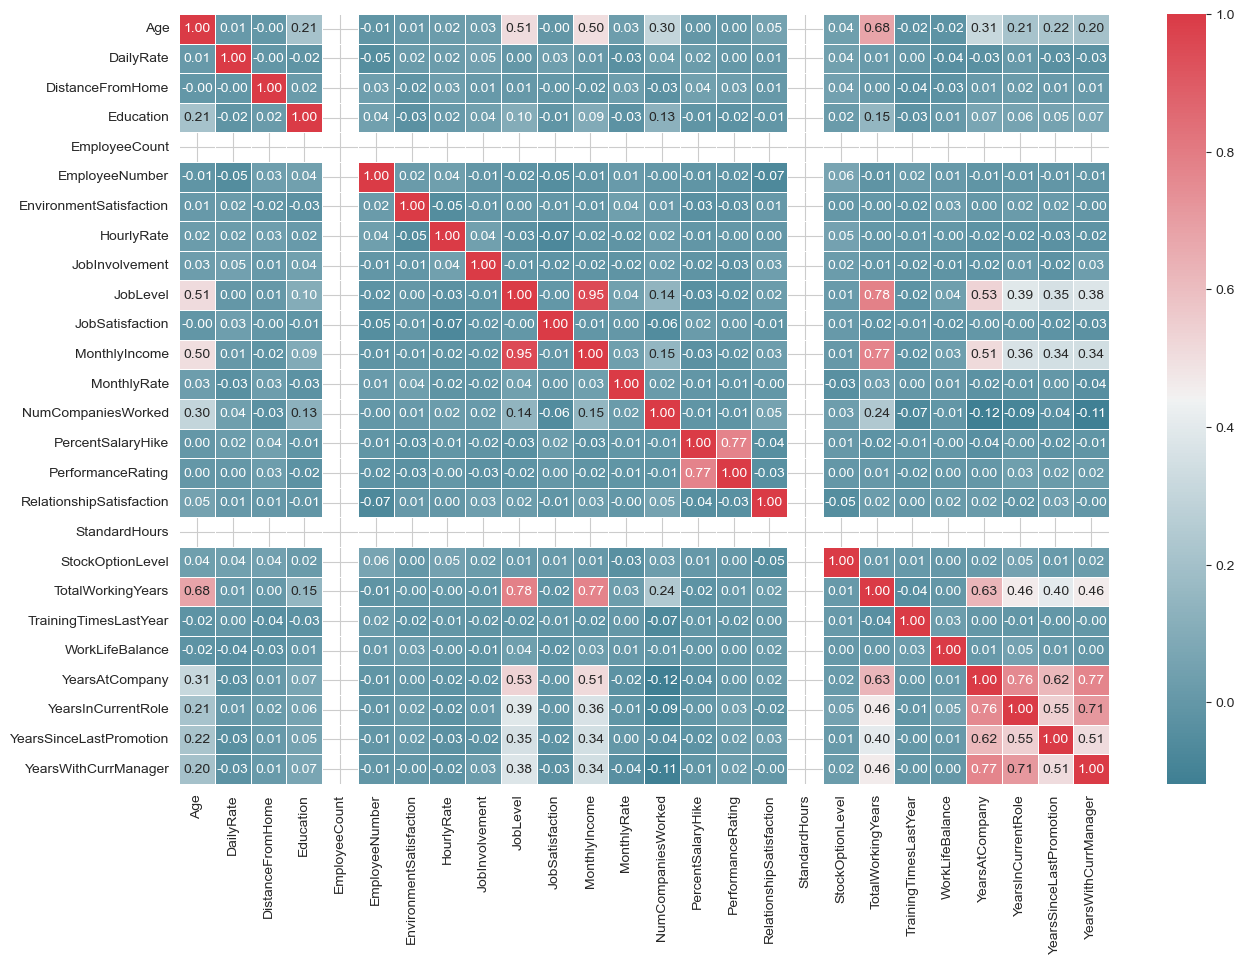

In [9]:
heat = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(heat, cmap=colormap, annot=True, fmt=".2f",linewidths=0.5)
plt.show()

1. From the heat map, it is observed that monthly rate are barely correlated with other attributes, while Monthly Income and job level (0.95), Job level and total working years(0.78), Monthly Income and total working years(0.77) are highly correlated
2. Daily rate and hourly rate are like monthly rate, not correlated with other attributes. Not sure what they mean. Doubt they are salary paid daily and hourly, because they don't correlated with monthly salary or any other attributes.
3. Therefore we delete daily rate, hourly rate and monthly rate from dataset.

In [10]:
df.duplicated().sum()

0

## EDA

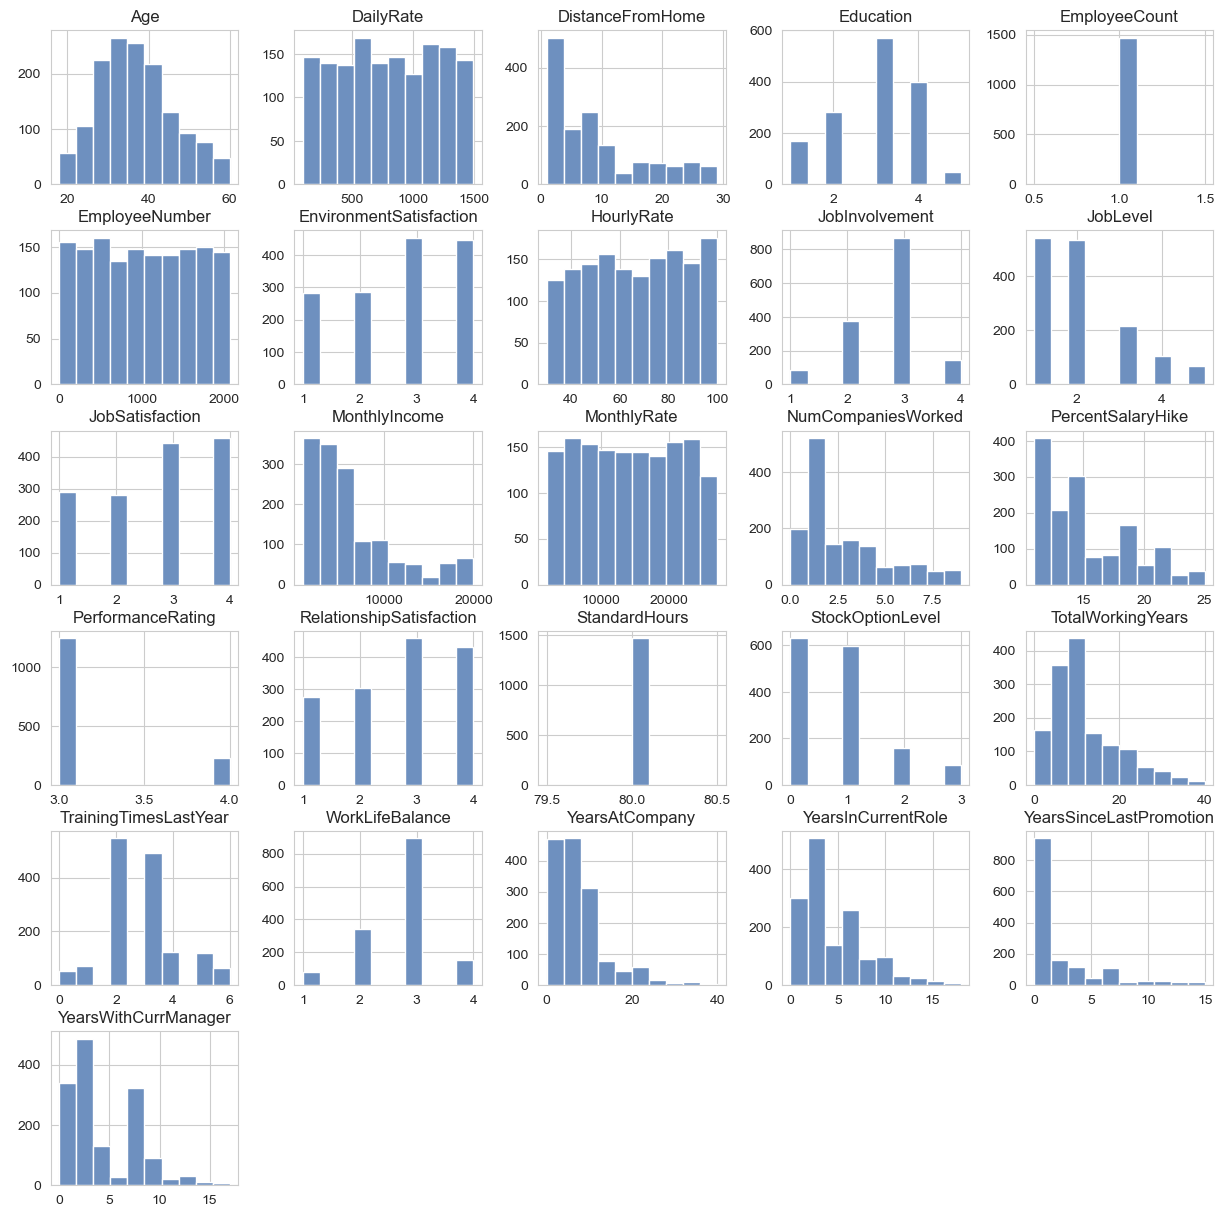

In [11]:
df.hist(figsize=(15,15))
plt.show()

From the histgram, we can say that some of columns only have one value, which will not contribute to the analysis: 
1. Over18: All values are Y
2. EmployeeCount: all values are 1.0
3. StandardHours: all values are 80.0

In [12]:
#drop MonthlyRate, and EmployeeNumber and columns only have one value
df1 = df.drop(['MonthlyRate','HourlyRate', 'DailyRate','Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)
df1.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0


so there are only 3 and 4 value

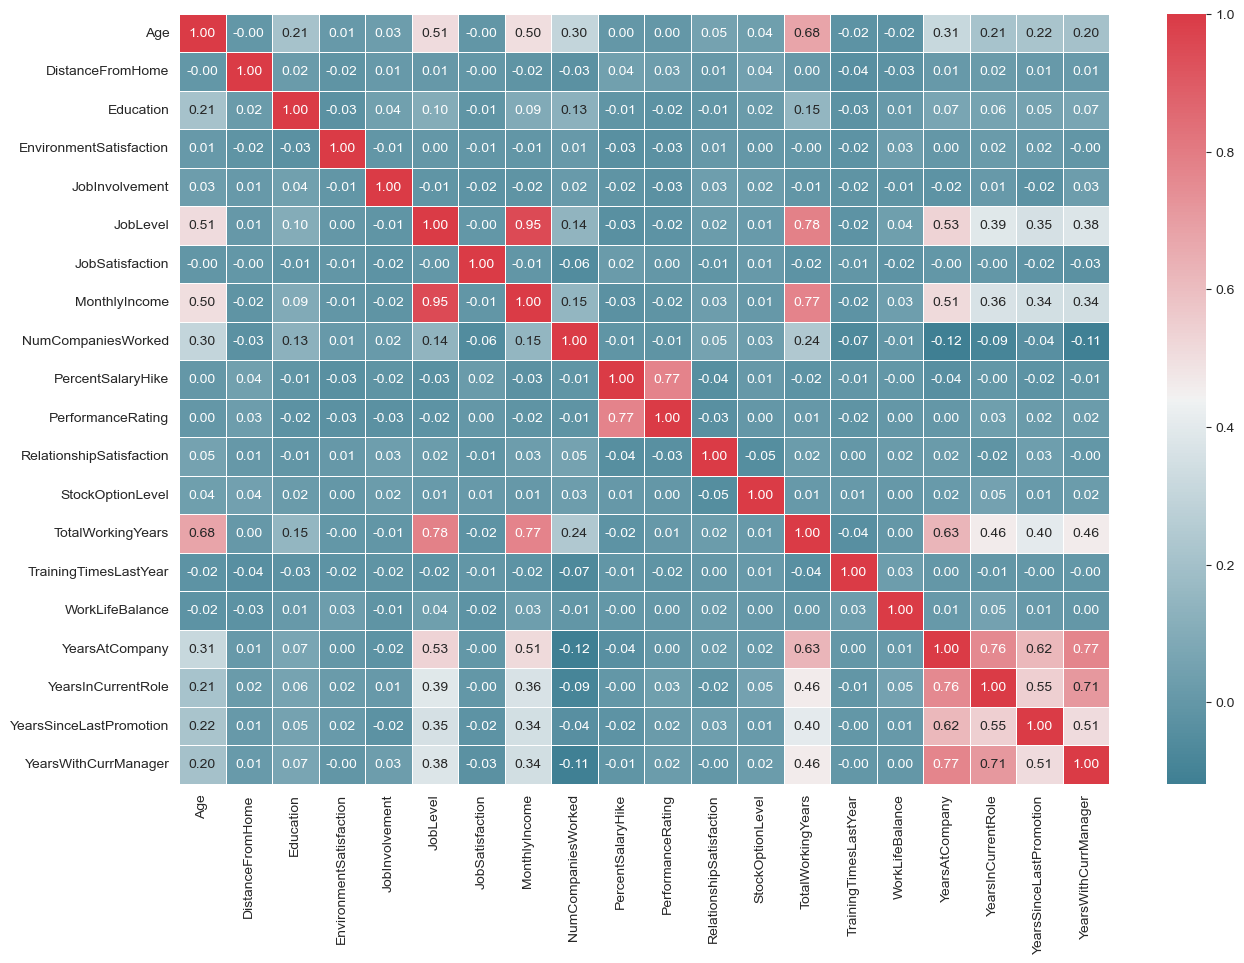

In [13]:
heat = df1.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(heat, cmap=colormap, annot=True, fmt=".2f",linewidths=0.5)
plt.show()

Insight:
1. There are high correlation between year related viables and job level and monthly income, which makes sense.
2. Job environment, job satisfaction, relationship satisfaction are not correlated to anything. 
3. Performace rating is highly correlated with percent salary hike, which makes sense, since empoyees who get high performance rating are likly to get a salary raise.

<Figure size 500x500 with 0 Axes>

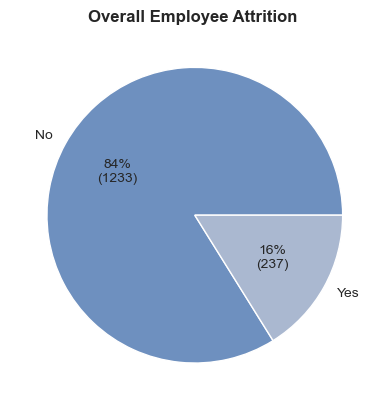

In [14]:
# Visualize overall Attrition
plt.figure(figsize=(5,5))
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df1.Attrition.value_counts()
total = len(df1.Attrition)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt)
plt.title("Overall Employee Attrition ",fontweight="black",size=12)
plt.show()

According to research from LinkedIn, the tech turnover rate stands at 13.2%, the highest turnover rate of any sector. Xpert HR cites an even higher turnover rate of 18.3% for the industry.
The dataset has attrition rate of 16%, which is typical of the tech sector.

In [15]:
cat = df1.select_dtypes(['object'])
cat1=cat.drop(['Attrition', ],axis=1)


####  Explore categorical viarables

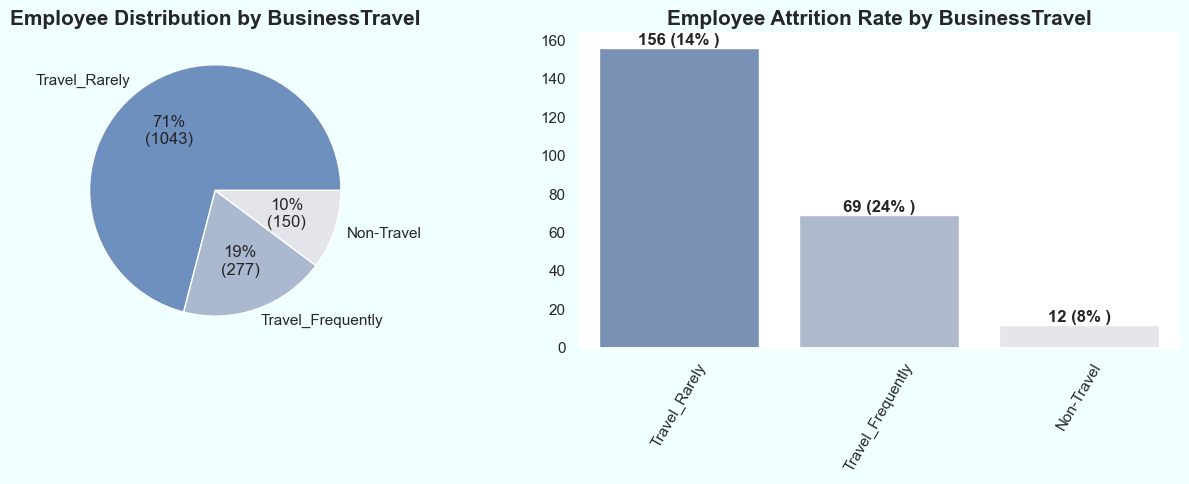

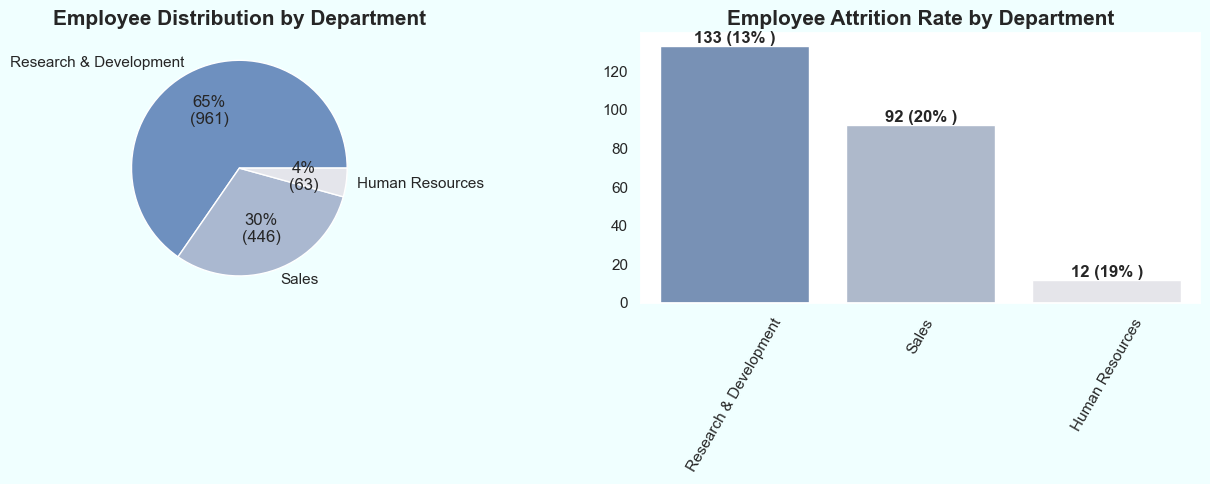

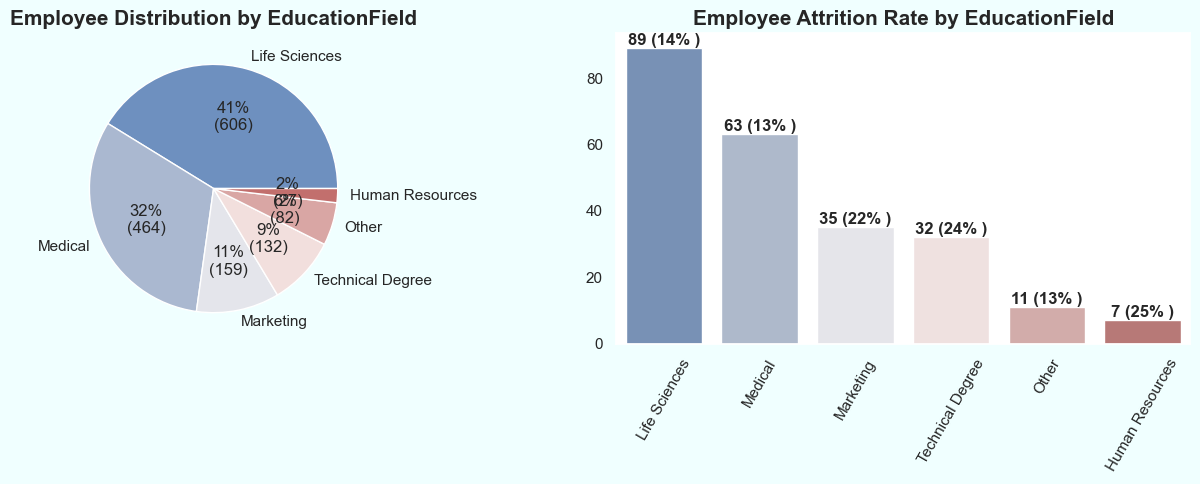

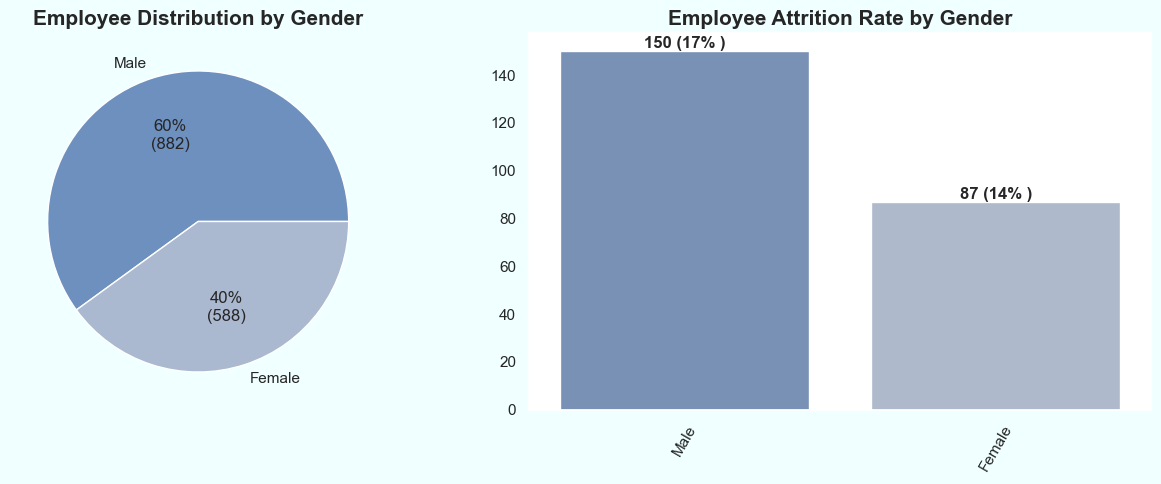

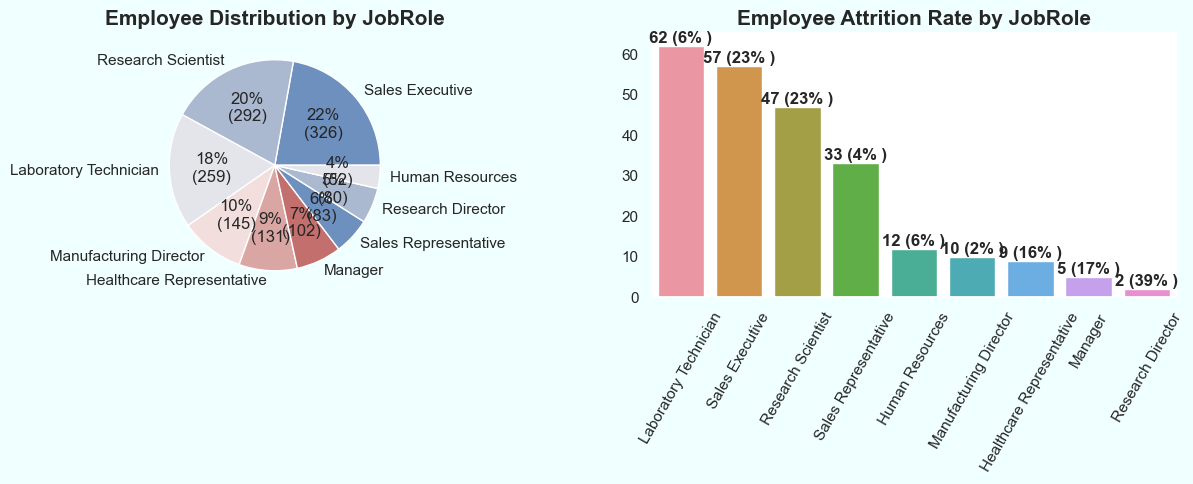

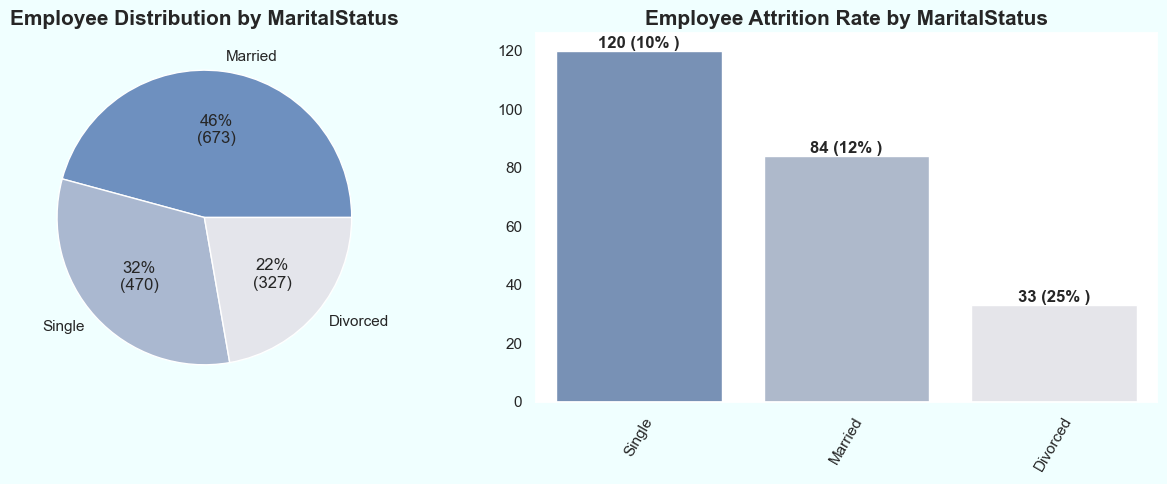

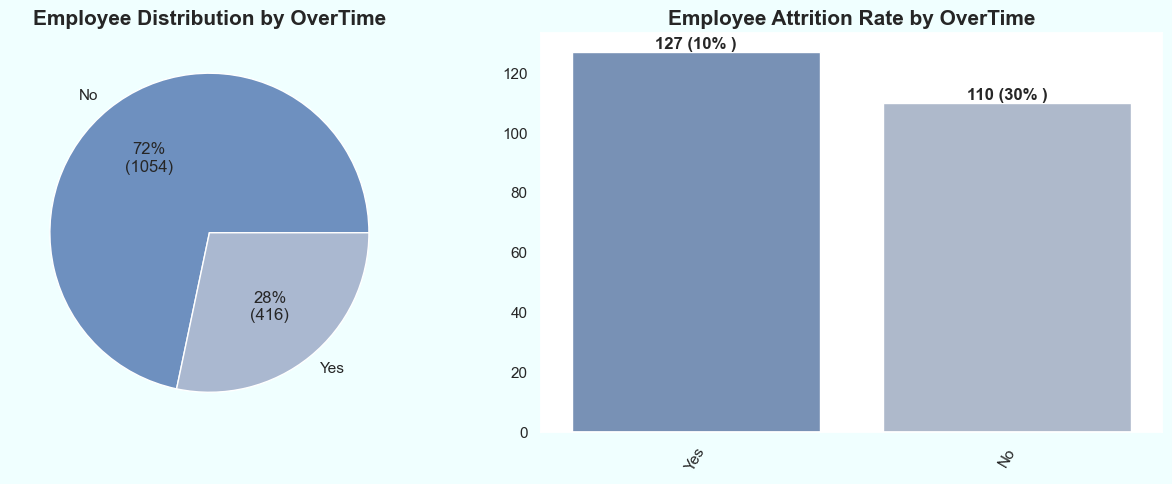

In [16]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 15

sns.set(rc={'axes.facecolor':'white','figure.facecolor':'azure'})
sns.set_palette('vlag')

cat_columns = cat1.columns
for i, col in enumerate(cat_columns):
    fig, axes = plt.subplots(1,2,figsize=(13,5))
    v_counts = cat[col].value_counts()
    total = len(cat[col])
    axes[0].pie(v_counts, labels=v_counts.index, autopct=my_fmt);
    axes[0].set_title(f"Employee Distribution by {col}", fontweight="black", size=15)
    
    plt.subplot(1,2,2)
    new_df = cat[cat["Attrition"]=="Yes"]
    value_1 = cat[col].value_counts()
    value_2 = new_df[col].value_counts()
    attrition_rate = np.floor((value_2/value_1)*100).values
    
    ax = sns.barplot(x=value_2.index, y=value_2.values, ax=axes[1])
    plt.title(f"Employee Attrition Rate by {col}",fontweight="black",size=15)
    for index,value in enumerate(value_2):
        plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",
                 ha="center",va="bottom",size=12,fontweight="black")
    plt.setp(ax.get_xticklabels(), rotation=60)
    plt.tight_layout()
    plt.show()

Inference:
1. Most of the employees in the organization Travel Rarely. Highest employee attrition can be observed by those employees who Travels Frequently.
2. Employees who are single has higher percentage of leaving the company compared to married and divorced people
3. Employees who have overtime are significantly more likely to attriate, 30% of atrrtion compared to 10% of no overtime.
4. Lower job level employees have higher chance to leave the company


In [21]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]

        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 7) 

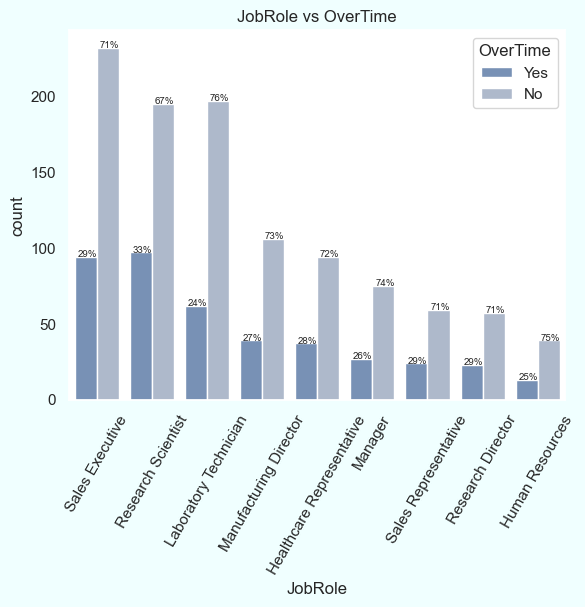

In [22]:
ax=sns.countplot(x=df1['JobRole'],data= df1, hue=df1['OverTime'])
plt.ylabel('count')
plt.xticks(rotation=60)
with_hue(ax, df1.JobRole, 9,2)
plt.title('JobRole vs OverTime')
plt.show()

Furthur dig into overtime by job roles, overtime rate is similar across the roles, about 25-20% have over time. Reaserch scientists have the highest overtime rate of 33% 

In [23]:
# Identify which positions travel the most
# df['FrequentTravel']=  df['BusinessTravel'].replace([]'female', 'FEMALE', inplace=True)

df2=df.replace(dict.fromkeys(['Non-Travel','Travel_Rarely'], 'Non-Frequently'))
df2.BusinessTravel.value_counts()

Non-Frequently       1193
Travel_Frequently     277
Name: BusinessTravel, dtype: int64

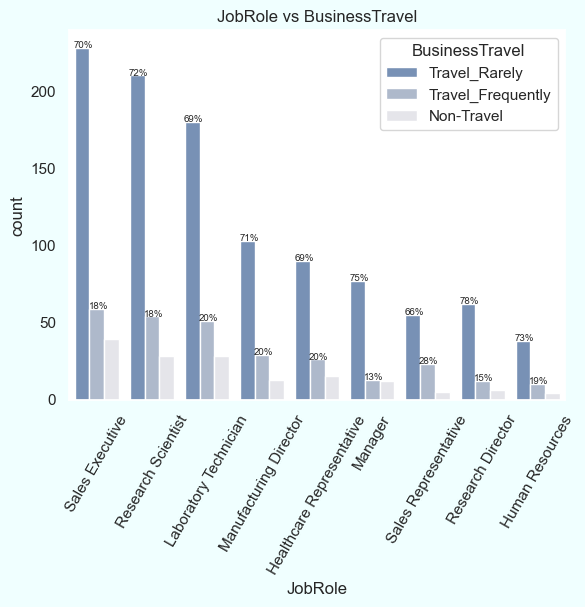

In [24]:
ax=sns.countplot(x=df['JobRole'],data= df, hue=df['BusinessTravel'])
plt.ylabel('count')
plt.xticks(rotation=60)
with_hue(ax, df1.JobRole, 9,2)
plt.title('JobRole vs BusinessTravel')
plt.show()

It is observed that 28% of sales representitives travel frequently, which is expected. 
But sales representitives only have 6% of attrition rate, which means other roles who travel frequently are more likely to leave.

**Solutions to reduce attrition:**
1. The company can identify the employees who have overtime and find out why they have overtime to find a way to reduce their ovetime. Maybe some of them need more training to be more efficient, maybe the manager can reallocate workload between team members.
2. The organization can split travelling among the employees to reduce the burden of employees who travel frequently.

####  Explore numeric viarables

In [25]:
num = df1.select_dtypes(['number'])

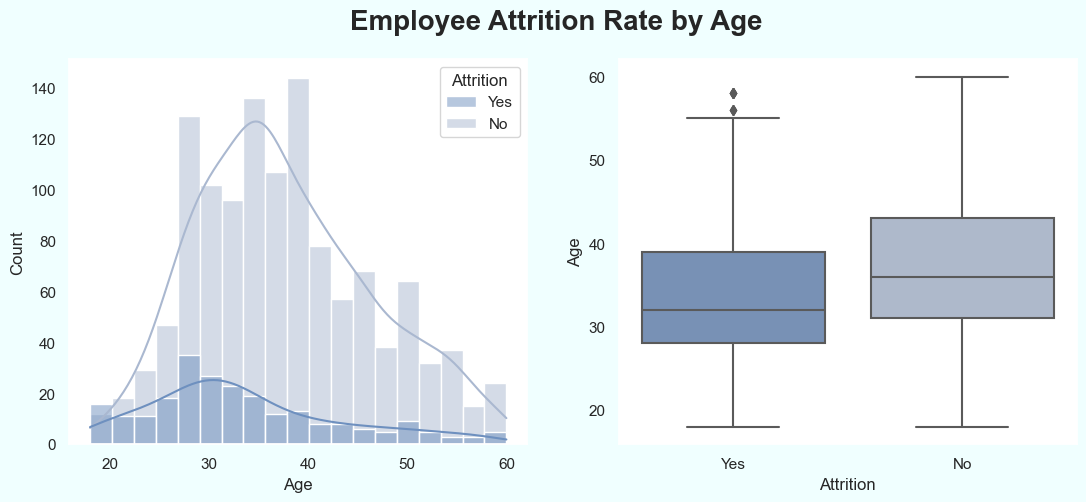

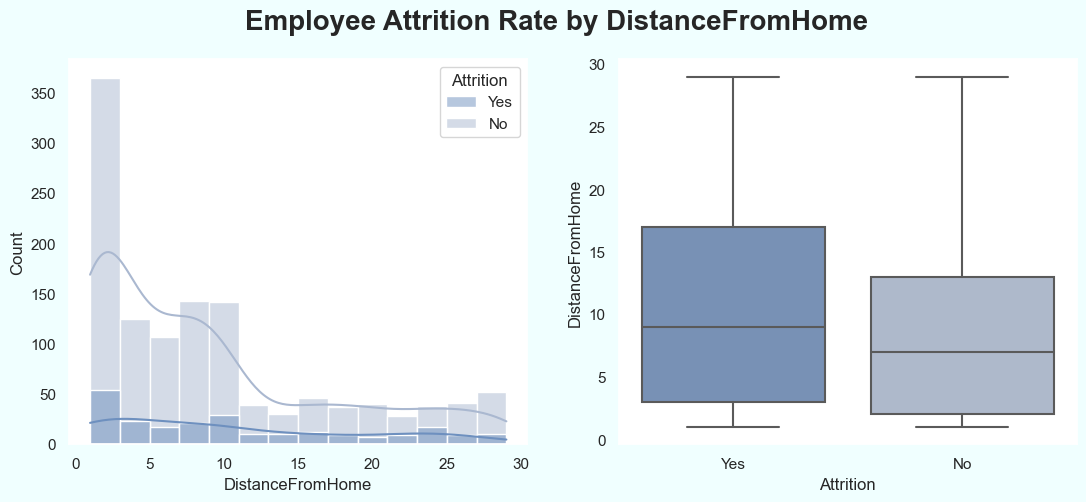

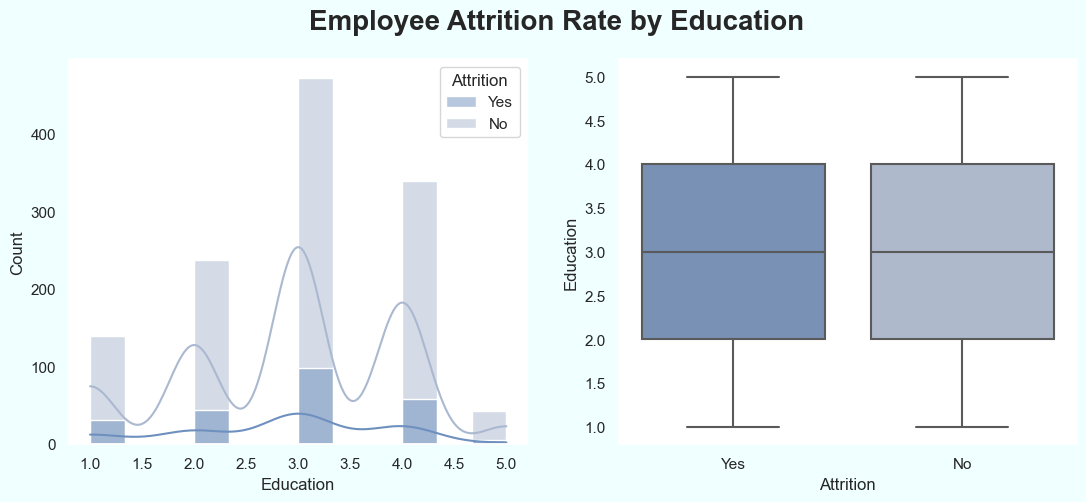

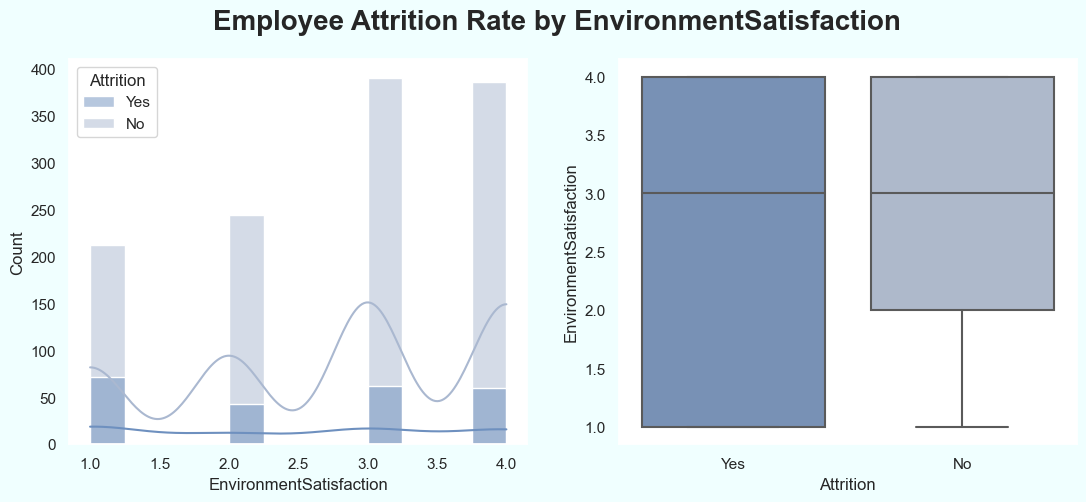

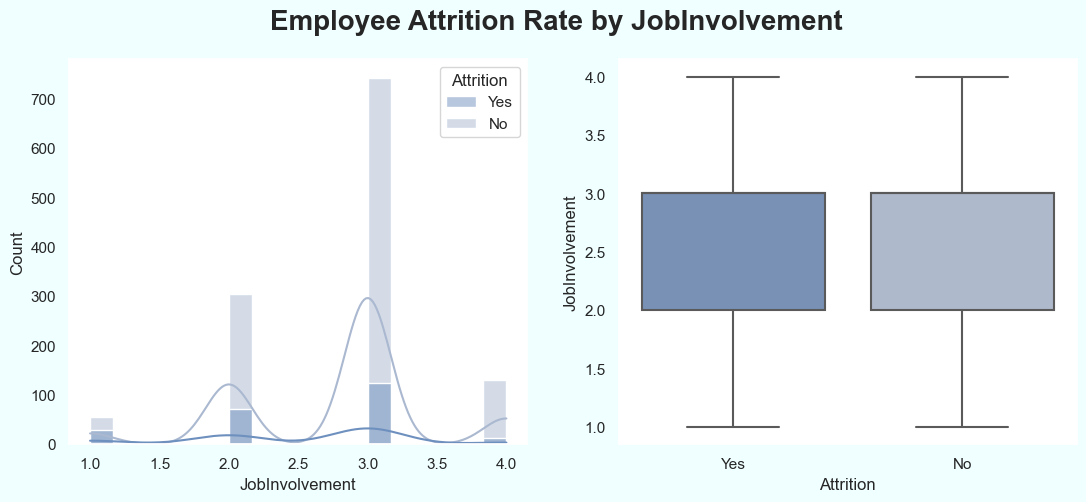

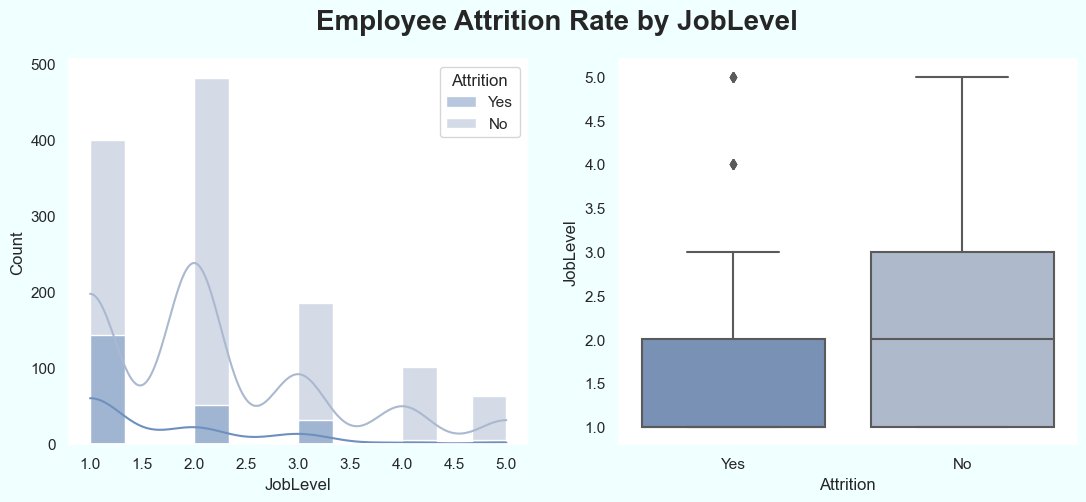

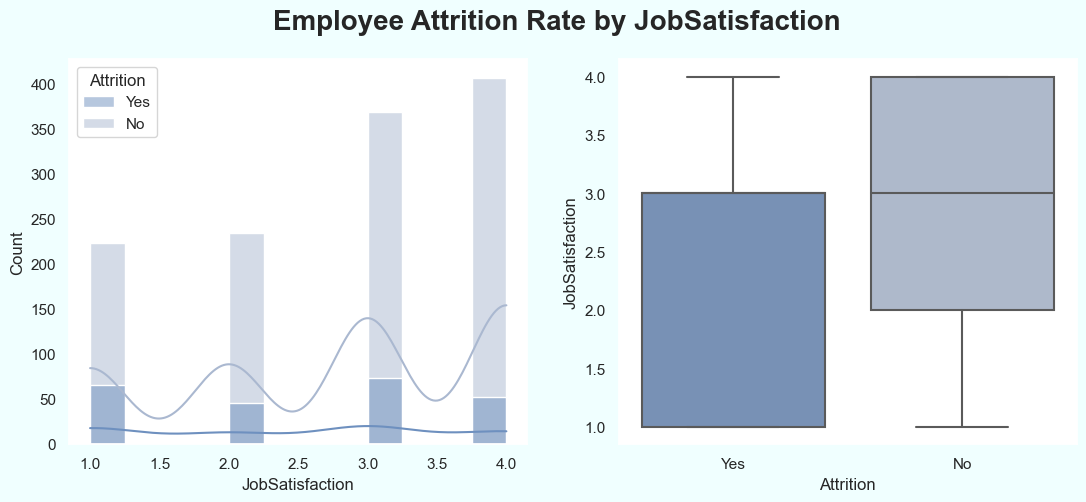

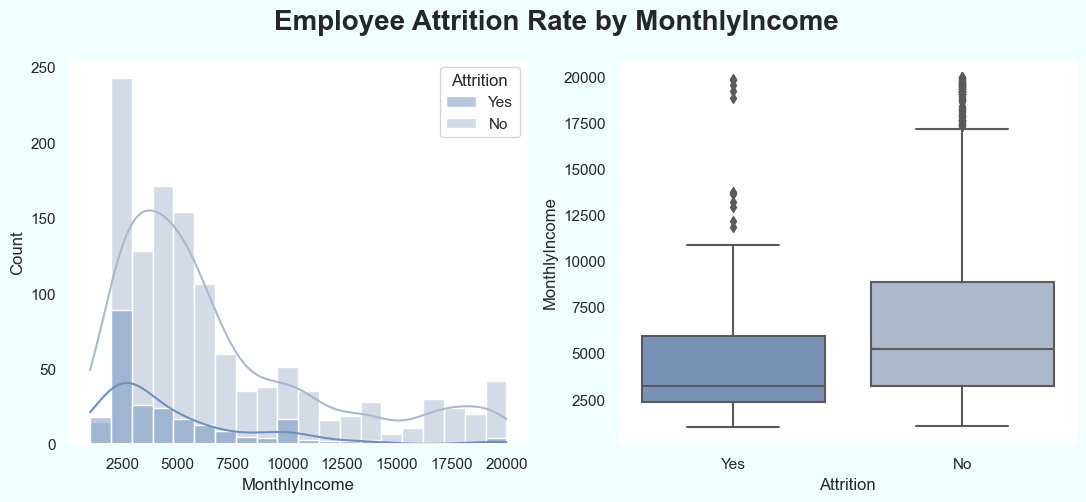

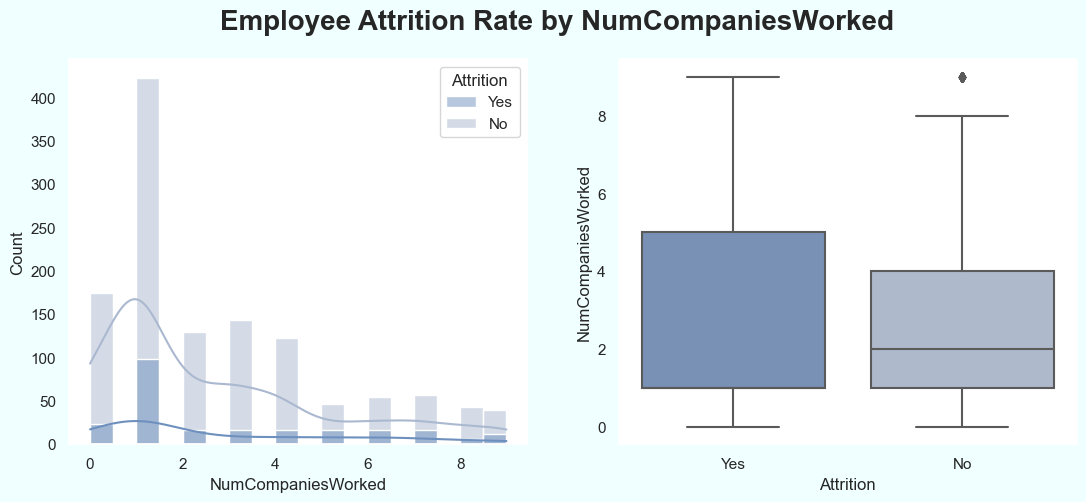

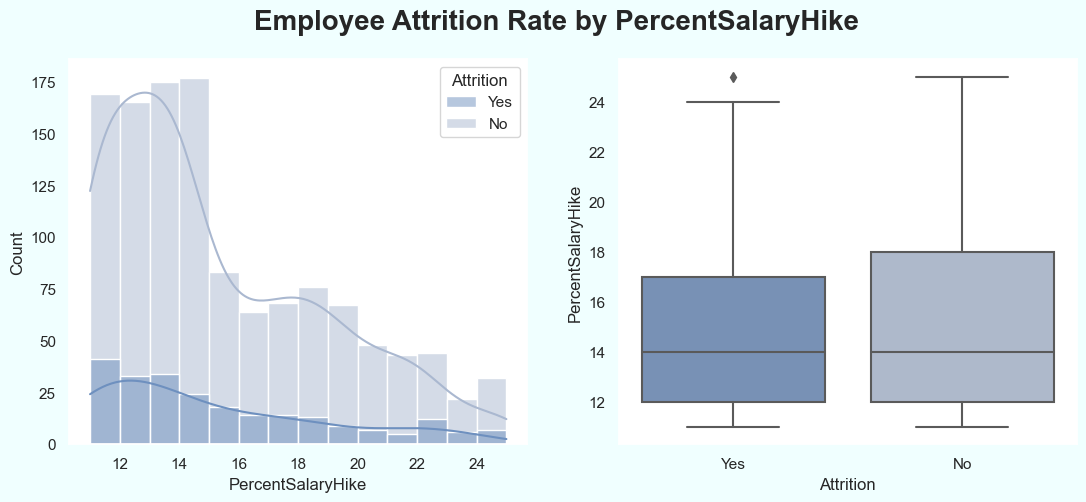

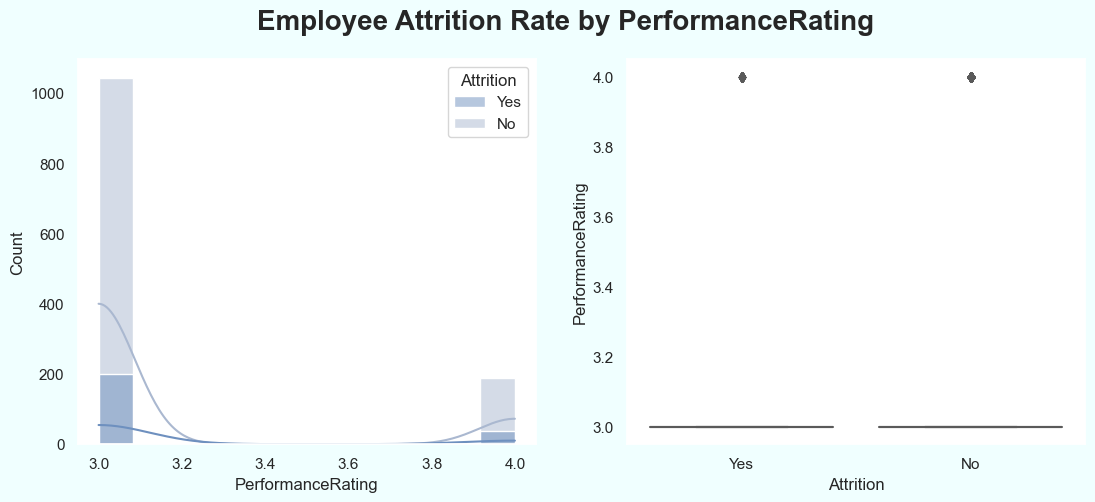

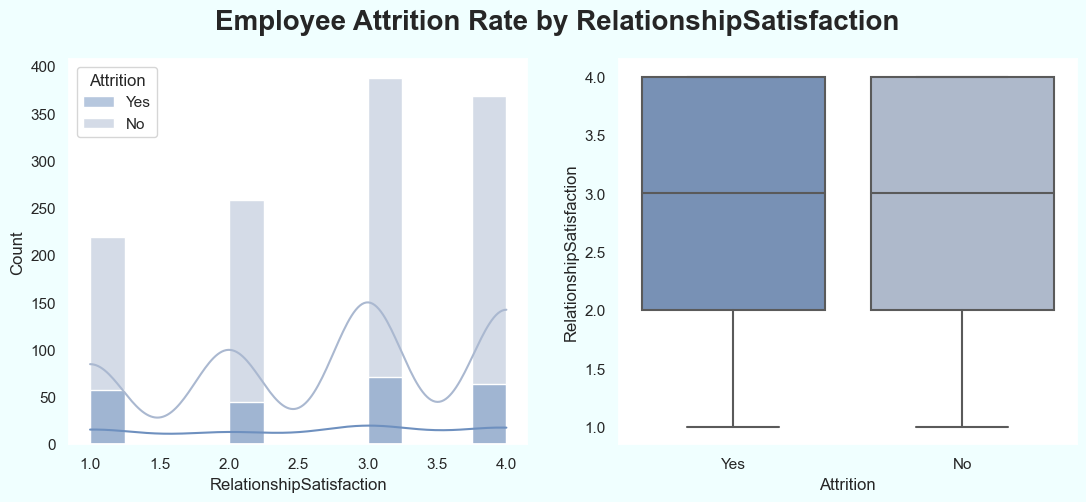

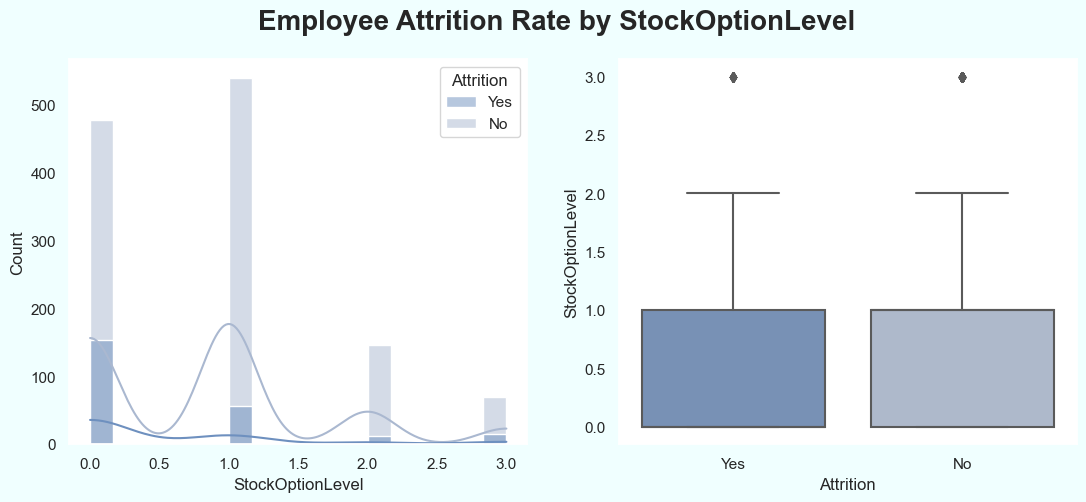

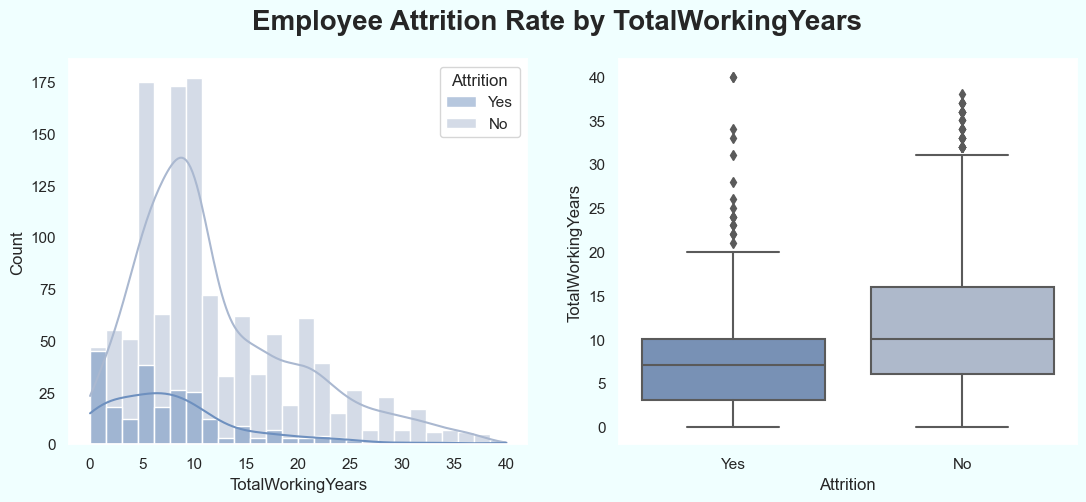

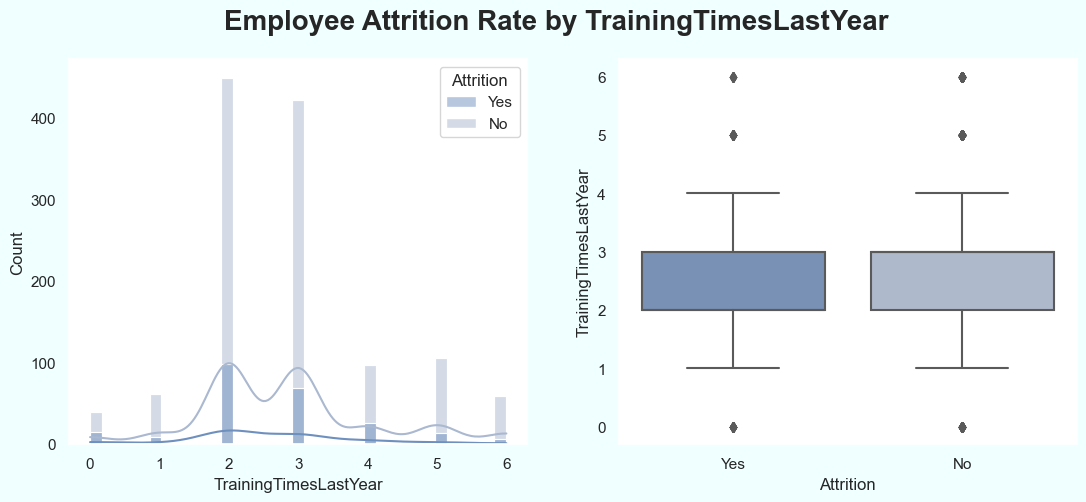

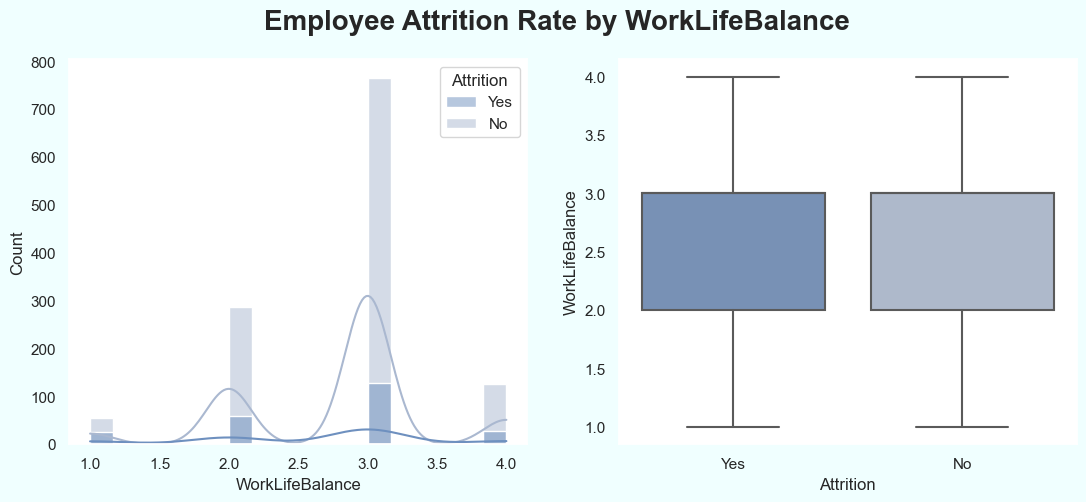

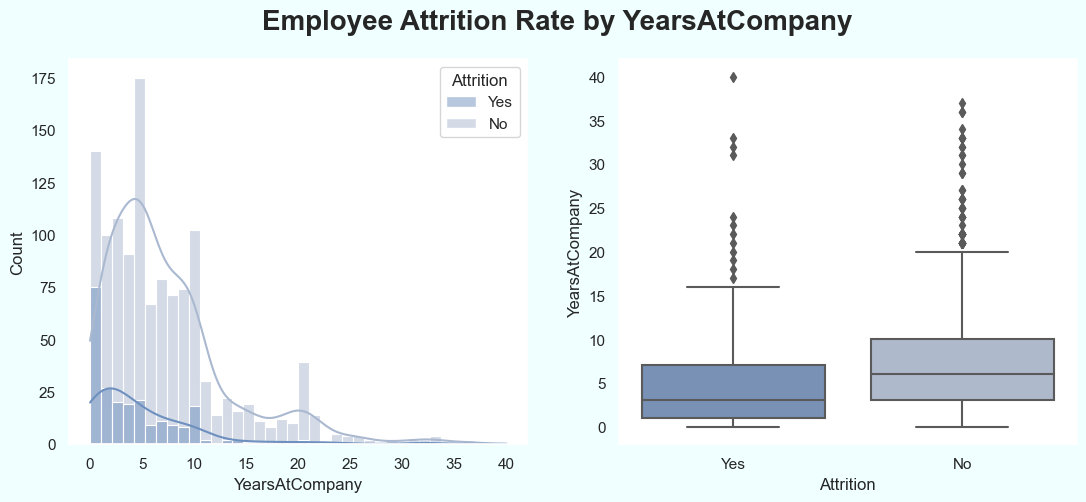

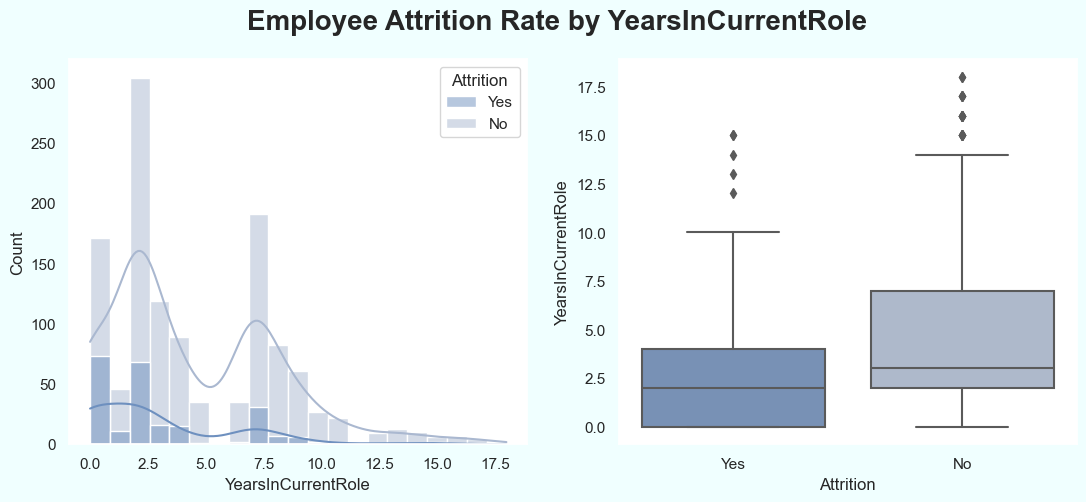

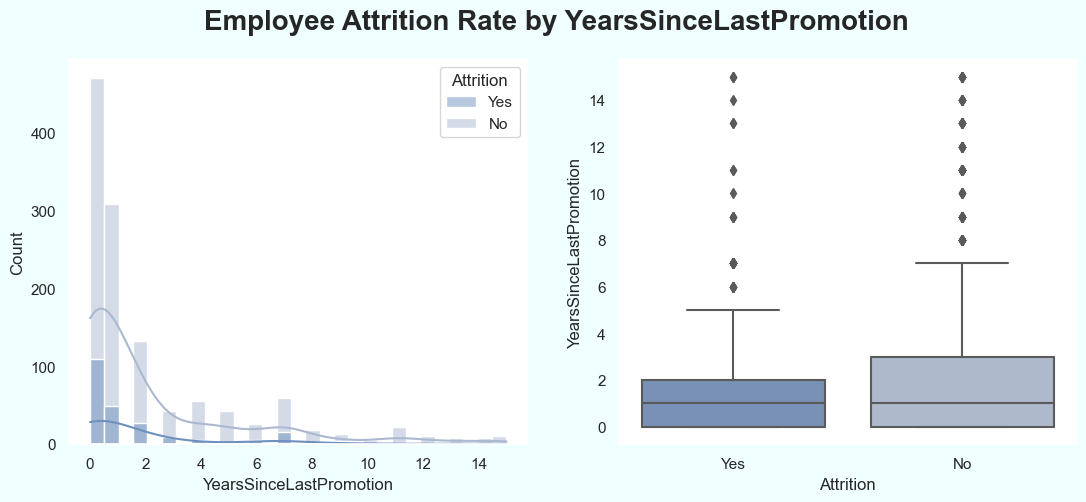

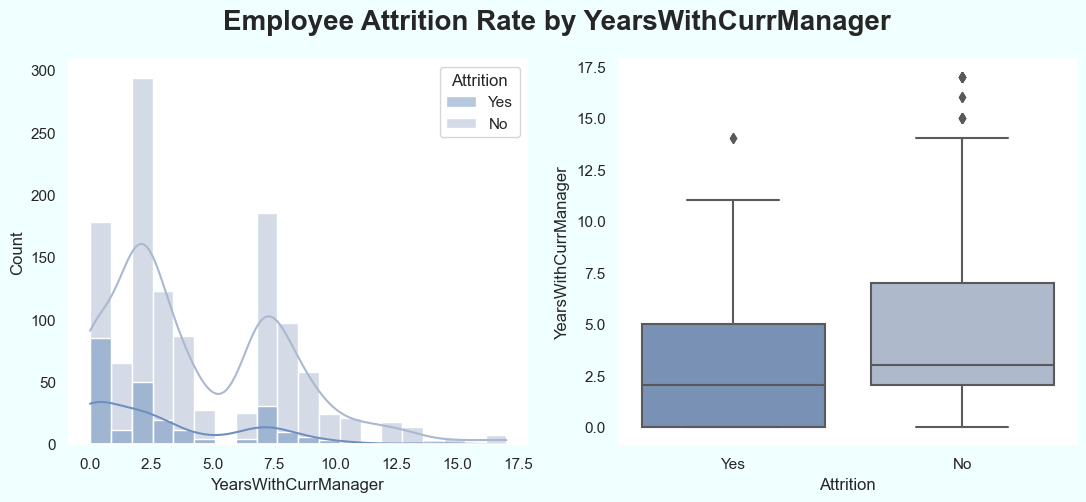

In [26]:
num_columns = num.columns
for i, col in enumerate(num_columns):
    fig, axes = plt.subplots(1,2,figsize=(13,5))
    ax = sns.histplot(data=num,x=col,hue=df1["Attrition"], kde=True, ax=axes[0])
    
    plt.subplot(1,2,2)
    ax = sns.boxplot(x=df1["Attrition"],y=col,data=num, ax=axes[1])
    
    plt.suptitle(f"Employee Attrition Rate by {col}",fontweight="black",size=20)

    plt.show()

Inference:
1. Younger people are more likly to attrite, similaer with other features correlated to age, such as Years At Company, Total Working Years, Years In Current Role, Years Since Last Promotion, Years With Current Manager.
2. Lower job level employees have higher chance to leave the company
3. There are correlations between attrition and pay related viarables, likek Monthly Income and Monthly Rate, Daily Rate, etc.
4. People who worked for more employers are more likly to leave
5. Surprisingly employees staying close to the organization are mostly leaving compared to employees staing far from the oragnization.
6. Employees with higher job satisfaction, environment satisfaction are less likly to leave.
7. There is no obvious correlation betwwen Attriation and the following viarables:
   * Work Life Blance
   * Job Involvement
   * Stock Option Level
   * Relationship Satisfaction
   * Performance Rating(only have two values, 3 and 4, means Excellent and Outstanding respectively)
   * Education

#### Explore gender equlity in pay and in management

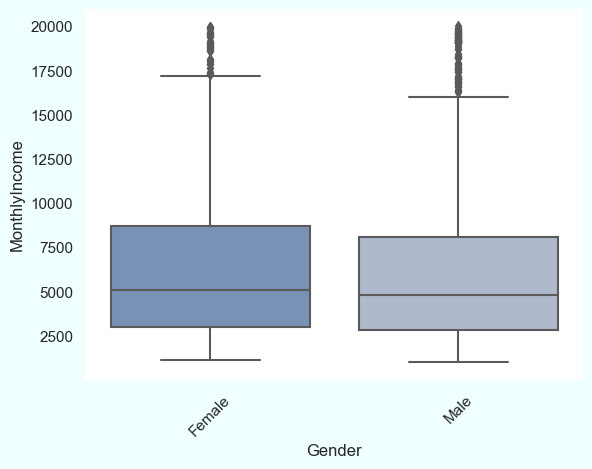

In [27]:
#explore gender equlity in pay
ax=sns.boxplot(y=df['MonthlyIncome'],x=df1['Gender'])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

Women in general get paid more

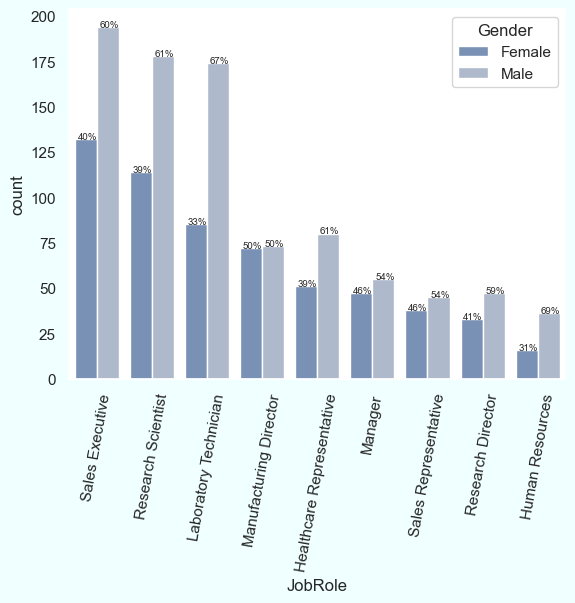

In [21]:
#explore gender equlity in management
ax=sns.countplot(x=df['JobRole'],data= df, hue=df['Gender'])
plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid(True,alpha=1)
plt.ylabel('count')
with_hue(ax, df.JobRole, 9,2)

In [22]:
#total_gender_ratio
df.Gender.value_counts(normalize=True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

While total gender ratio in the company is 6:4, for manager roles, women has a slightly higer percentage

In [23]:
df1.JobLevel.unique()

array([2, 1, 3, 4, 5])

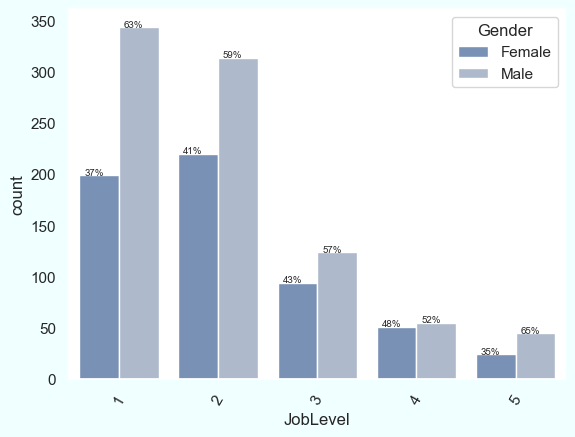

In [24]:
#explore gender equlity in management
ax=sns.countplot(x=df['JobLevel'],data= df, hue=df['Gender'])
plt.setp(ax.get_xticklabels(), rotation=60)
plt.grid(True,alpha=1)
plt.ylabel('count')
with_hue(ax, df.JobLevel, 5,2)

While total gender ratio in the company is 6:4, for the highest ljob level 5, women has a significantly lower percentage

### Feature engineering

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, average_precision_score,precision_recall_curve, make_scorer,classification_report
import warnings
warnings.filterwarnings("ignore")

In [26]:
label_encoder = LabelEncoder()
df1['Attrition'] = label_encoder.fit_transform(df1['Attrition'])
df1['OverTime'] = label_encoder.fit_transform(df1['OverTime'])
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])

In [27]:
df1 = pd.get_dummies(df1,columns=['BusinessTravel','Department',
                                'EducationField','JobRole','MaritalStatus'])
df1.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,0,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,3,1,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,1,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,0,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,1,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


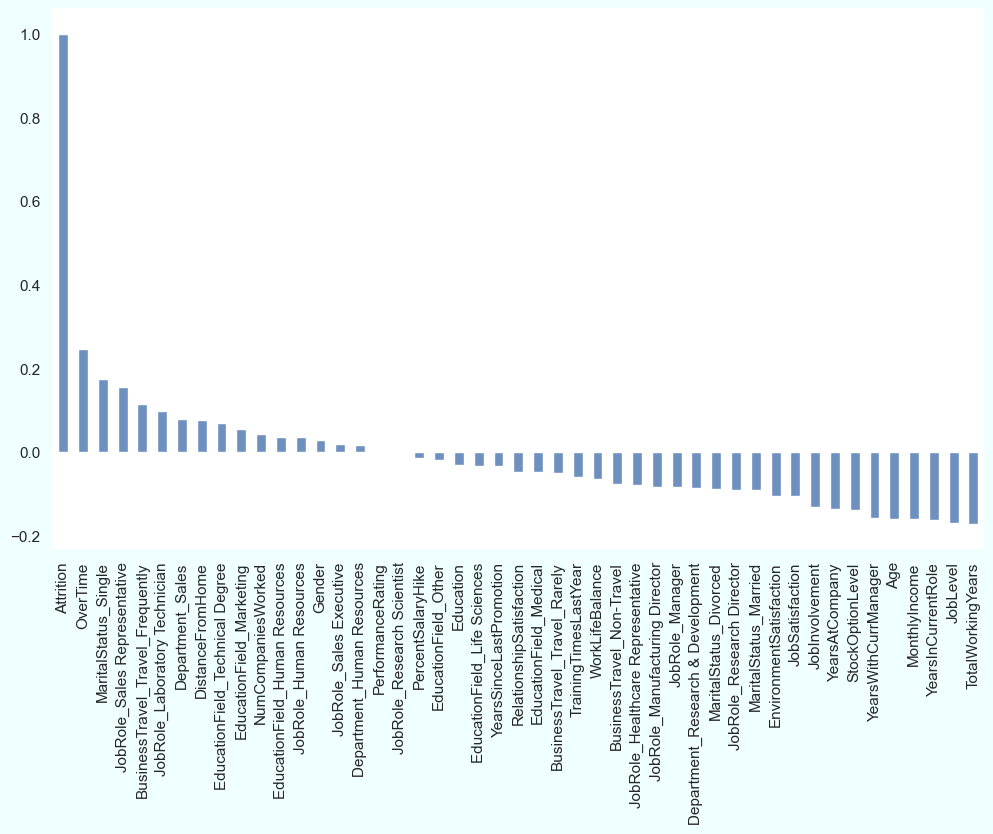

In [28]:
plt.figure(figsize=(12,7))
correlations = df1.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [ ]:
label_encoder = LabelEncoder()
df1['Attrition'] = label_encoder.fit_transform(df1['Attrition'])
df1['OverTime'] = label_encoder.fit_transform(df1['OverTime'])
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])

df1 = pd.get_dummies(df1,columns=['BusinessTravel','Department',
                                'EducationField','JobRole','MaritalStatus'])


In [31]:
training_data, test_data = train_test_split(df1, test_size=0.1, random_state=5)

X_train =training_data.drop(['Attrition'],axis=1)
y_train= training_data.Attrition

X_test =test_data.drop(['Attrition'],axis=1)
y_test= test_data.Attrition

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1323, 46), (1323,), (147, 46), (147,))

#### Choosing  evaluation metric

1. **Consideration of Imbalanced Dataset:**
    - The dataset exhibits an imbalance with an 84:16 ratio between the majority class (employees who don't leave, negative class) and the minority class (employees who leave, positive class).
    - Choosing an appropriate evaluation metric is crucial given this imbalance.

2. **Alignment with Business Objectives:**
    - The primary business objective is to reduce attrition, leading to a decrease in recruitment and training costs.
    - When evaluating model performance, it's imperative to weigh the costs associated with false positives and false negatives. Namely, the organization need to evaluate the cost associated to try to prevent that from happening, and comparing that to the cost/damange if the employee leaves.
    - If the cost of prevention is greater than the cost of leaving, prioritizing recall for the positive class becomes crucial.
    - On the other hand, if the cost of prevention is less than the cost of leaving are comparable, precision takes precedence.
    - Alternatively, the F1 score, being the harmonic mean of precision and recall, is often favored for striking a balance between the two metrics.
    
F1 score will be used as the metric in this project

### Modeling

#### Logistic Regression

In [37]:
#Logistic Regression with none class weights
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, average_precision_score,precision_recall_curve, make_scorer,classification_report
import warnings
warnings.filterwarnings("ignore")

In [38]:
log0= LogisticRegression(C=1000,max_iter=10000)
log_model_0 = log0.fit(X_train,y_train)
y_pred_0 = log_model_0.predict(X_test)
print(classification_report(y_test,y_pred_0))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.67      0.36      0.47        22

    accuracy                           0.88       147
   macro avg       0.78      0.67      0.70       147
weighted avg       0.86      0.88      0.86       147



In [39]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_X_train , smotey_y_train = oversampler.fit_resample(X_train,y_train)

In [40]:
smotey_y_train.value_counts()

1    1108
0    1108
Name: Attrition, dtype: int64

In [41]:
log_1 = LogisticRegression(C=1000,max_iter=10000)
log_model_1 = log_1.fit(smote_X_train,smotey_y_train)
y_pred_1 = log_model_1.predict(X_test)

print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       125
           1       0.37      0.32      0.34        22

    accuracy                           0.82       147
   macro avg       0.63      0.61      0.62       147
weighted avg       0.81      0.82      0.81       147



Oversampling didn't help

In [57]:
count_class_0, count_class_1 = df1.Attrition.value_counts()
count_class_0, count_class_1 

class_weight=count_class_1/ count_class_0
class_weight

CLASS_WEIGHT= {0: class_weight, 1: 1}
CLASS_WEIGHT

{0: 0.1922141119221411, 1: 1}

In [58]:
log_2 = LogisticRegression(C=1000,max_iter=10000,class_weight=CLASS_WEIGHT)
log_model_2=log_2.fit(X_train,y_train)
y_pred_2 = log_model_2.predict(X_test)
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       125
           1       0.33      0.77      0.46        22

    accuracy                           0.73       147
   macro avg       0.64      0.75      0.64       147
weighted avg       0.85      0.73      0.76       147



Specifying class weight improved recall but decreased pecision and f1 score

#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_X_train,smotey_y_train)
y_pred_rf = rfc.predict(X_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       125
           1       0.67      0.27      0.39        22

    accuracy                           0.87       147
   macro avg       0.78      0.62      0.66       147
weighted avg       0.85      0.87      0.85       147



#### SVC

In [45]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced', kernel= 'linear')
svc_model_0 = svc.fit(X_train, y_train)

y_pred_svc = svc_model_0.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       125
           1       0.35      0.77      0.49        22

    accuracy                           0.76       147
   macro avg       0.65      0.76      0.66       147
weighted avg       0.86      0.76      0.79       147



#### XGBoost

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_0= xgb.fit(X_train, y_train)

y_pred_xgb = xgb_0.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       125
           1       0.69      0.50      0.58        22

    accuracy                           0.89       147
   macro avg       0.80      0.73      0.76       147
weighted avg       0.88      0.89      0.88       147



In [48]:
# include DailyRate, HourlyRate, MonthlyRate

df3 = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)
df3.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['Attrition'] = label_encoder.fit_transform(df3['Attrition'])
df3['OverTime'] = label_encoder.fit_transform(df3['OverTime'])
df3['Gender'] = label_encoder.fit_transform(df3['Gender'])

df3 = pd.get_dummies(df3,columns=['BusinessTravel','Department',
                                'EducationField','JobRole','MaritalStatus'])

training_data, test_data = train_test_split(df3, test_size=0.1, random_state=5)
training_data.shape, test_data.shape

X_train =training_data.drop(['Attrition'],axis=1)
y_train= training_data.Attrition

X_test =test_data.drop(['Attrition'],axis=1)
y_test= test_data.Attrition

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1323, 49), (1323,), (147, 49), (147,))

In [51]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_1= xgb.fit(X_train, y_train)

y_pred_xgb_1 = xgb_1.predict(X_test)
print(classification_report(y_test,y_pred_xgb_1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.88      0.32      0.47        22

    accuracy                           0.89       147
   macro avg       0.88      0.66      0.70       147
weighted avg       0.89      0.89      0.87       147



Adding these features didn't help nor hurt